In [26]:
%load_ext autoreload
%autoreload 2

import torch
from clustering import Clustering

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
model = Clustering(pi=[1,2,3], sigma_n=.2, sigma_theta=1., dim=2)

In [87]:
ys, zs = model.sample(300)

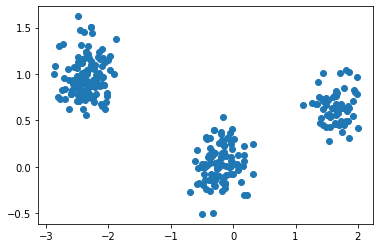

In [88]:
from matplotlib import pyplot as plt

plt.scatter(ys[:, 0], ys[:, 1]) 

In [89]:
log_l = model.log_likelihood(ys, zs)
print(log_l)

tensor([-26732.5547])


In [90]:
log_p = model.log_prior(model.theta, zs)
print(log_p)

tensor(-973.4230)


In [91]:
from ais import ais_trajectory

In [100]:
loader = [ys]*100

In [101]:
theta = torch.zeros_like(model.theta)
zs = torch.randint_like(zs, low=0, high=3)

In [102]:
log_likelihood_fn = model.log_likelihood
log_prior_fn = model.log_prior

In [103]:
import numpy as np

In [104]:
logw, zs, theta = ais_trajectory(model,
            theta,
            zs,
            loader,
            log_likelihood_fn,
            log_prior_fn,
            forward=True,
            schedule=np.linspace(0., 1., 50),
            n_sample=100)

49it [00:00, 91.67it/s]
10it [00:00, 91.62it/s]torch.Size([50])
Last batch stats -3.9120
tensor([-65571.0391])
49it [00:00, 88.91it/s]
10it [00:00, 91.01it/s]torch.Size([50])
Last batch stats -3.9120
tensor([-73295.6719])
49it [00:00, 85.58it/s]
9it [00:00, 83.85it/s]torch.Size([50])
Last batch stats -3.9120
tensor([-12630.9307])
49it [00:00, 84.59it/s]
9it [00:00, 89.49it/s]torch.Size([50])
Last batch stats -3.9120
tensor([-11714.3477])
49it [00:00, 91.72it/s]
9it [00:00, 84.49it/s]torch.Size([50])
Last batch stats -3.9120
tensor([-7483.9951])
49it [00:00, 89.89it/s]
9it [00:00, 87.14it/s]torch.Size([50])
Last batch stats -3.9120
tensor([-24476.9219])
49it [00:00, 85.71it/s]
8it [00:00, 77.57it/s]torch.Size([50])
Last batch stats -3.9120
tensor([-22066.0078])
49it [00:00, 89.88it/s]
9it [00:00, 87.07it/s]torch.Size([50])
Last batch stats -3.9120
tensor([-21212.7500])
49it [00:00, 82.99it/s]
9it [00:00, 87.56it/s]torch.Size([50])
Last batch stats -3.9120
tensor([-65665.2031])
49it [00:

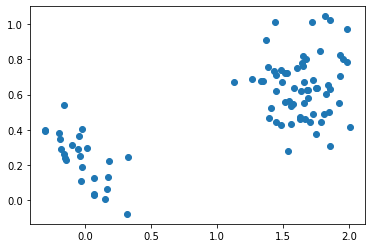

In [107]:
from matplotlib import pyplot as plt

plt.scatter(ys[:, 0][zs==2], ys[:, 1][zs==2]) 